In [6]:
%pip install matplotlib
%pip install numpy
%pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt   #Used to create the graphs
import math

e = math.e

#function definitions for Set A: both x(t) and dx / dt

def mountain_lion_xt(t : float, **constants):
    r = constants.get("r")
    L = constants.get("L")
    return (L*0.5*pow(e,r*t)) / (L+0.5*(-1+pow(e,r*t)))

def mountain_lion_dxdt(t : float, x : float,  **constants) -> float:
    r = constants.get("r")
    L = constants.get("L")
    return (r*x)*(1-x/L)

#x_0: given initial amount
#t_interval: expect a tuple (start, stop) - inclusive on both ends
#h: step size
#dxdt: derivative function that is called (just put the name of the function) (e.g. dxdt = mountain_lion_dxdt)
#**constants: pass in keyword constants that dxdt might need (e.g. r=r, L=L)

def eulers_method(x_0 : float, t_interval : tuple, h : float, dxdt : callable, **constants) -> list: 
    t_list = np.arange(start=t_interval[0] + h, stop=t_interval[1] + h, step=h)
    x_value_euler = [x_0]
    
    for t in t_list: 
        deriv = dxdt(t, x_value_euler[-1], **constants)   #Calculate change in x
        x_value_euler.append(x_value_euler[-1] + deriv * h)       #Calculate x value for next step of Euler's

    t_list = np.insert(t_list, 0, t_interval[0])
    return [t_list, x_value_euler]

#t_interval: expect a tuple (start, stop) - inclusive on both ends
#num_points: number of points generated for both axes
#xt: function that is called to generate height values of plot
#**constants: pass in keyword constants that xt might need (e.g. r=r, L=L)

def get_plot(t_interval : tuple, num_points : int, xt : callable, **constants) -> list: 
    t_list = np.linspace(start=t_interval[0], stop=t_interval[1], num=num_points)
    x_list = []

    for t in t_list: 
        x_list.append(xt(t, **constants))
        
    return [t_list, x_list]

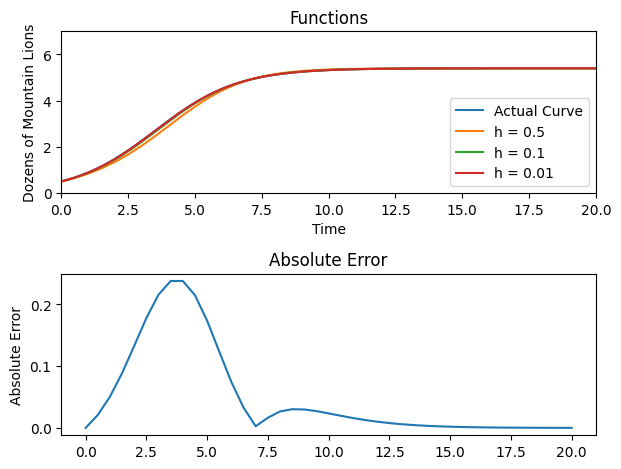

In [2]:
#Task set A, problem 2, h = 0.5
e = math.e

r = 0.65                                 #Constant rate
L = 5.4                                 #Constant carrying capacity

h_1 = 0.5
h_2 = 0.1
h_3 = 0.01

#generate euler's method plots for all 3 step sizes
euler_plot_h1 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_1, dxdt=mountain_lion_dxdt, r=r, L=L) 
euler_plot_h2 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_2, dxdt=mountain_lion_dxdt, r=r, L=L) 
euler_plot_h3 = eulers_method(x_0=0.5, t_interval=(0, 20), h=h_3, dxdt=mountain_lion_dxdt, r=r, L=L) 

#get actual plots (we will only plot 1 actual plot, but generating 2 others that have the same number of points as their respective euler's method plot to simply the error plot calculations)
actual_plot_1 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h1[0]), xt=mountain_lion_xt, r=r, L=L)
actual_plot_2 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h2[0]), xt=mountain_lion_xt, r=r, L=L)
actual_plot_3 = get_plot(t_interval=(0, 20), num_points=len(euler_plot_h3[0]), xt=mountain_lion_xt, r=r, L=L)

#error plot calculations
error_plot_1 = [actual_plot_1[0], list(map(abs, np.array(actual_plot_1[1]) - np.array(euler_plot_h1[1])))]
error_plot_2 = [actual_plot_2[0], list(map(abs, np.array(actual_plot_2[1]) - np.array(euler_plot_h2[1])))]
error_plot_3 = [actual_plot_3[0], list(map(abs, np.array(actual_plot_3[1]) - np.array(euler_plot_h3[1])))]

figure, axes = plt.subplots(2, 1)             #Required for multiple plots     (2 rows 1 col)


#x and y bounds
axes[0].set_xlim((0, 20))
axes[0].set_ylim((0, 7))

#graphing each of our plots
axes[0].plot(actual_plot_1[0], actual_plot_1[1])
axes[0].plot(euler_plot_h1[0], euler_plot_h1[1])
axes[0].plot(euler_plot_h2[0], euler_plot_h2[1])
axes[0].plot(euler_plot_h3[0], euler_plot_h3[1])

axes[1].plot(error_plot_1[0], error_plot_1[1])

#axes[0].plot(t ,x)                           #Create Euler's plot             (1st column plot)
#axes[0].plot(t, xActual)                     #Create actual function plot     (1st column plot)
#axes[1].plot(t, yError)                      #Create error plot               (2nd column plot)

#plt.semilogy()

#axes[0].xlabel('Time')
#axes[0].ylabel('Population')
#axes[0].legend(['Approximation', 'Actual'])
axes[0].set_title('Functions')                        #Add title to plot

#axes[1].xlabel('Time')
#axes[1].ylabel('Error')
#axes[1].legend(['Absolute Error'])
axes[1].set_title('Absolute Error')                   #Add title to plot

axes[0].legend(["Actual Curve", "h = 0.5", "h = 0.1", "h = 0.01"])
axes[0].set_xlabel("Time")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Dozens of Mountain Lions")
axes[1].set_ylabel("Absolute Error")

plt.tight_layout()
plt.show()                                            #Print plot











There are 3 Euler curves and one absolute error curve. The error grows initially because the curve doesn't follow the exact solution (Euler's Method is an approximation), but right before 7 seconds, there is an inflection point in the equation and the Euler's approximation takes time to reflect that and so it overshoots the trajectory of the actual curve. The error goes to zero as the curves intersect but as the approximation continues to overshoot, the error begins to increase again and goes back to zero as the curve approaches the carrying capacity and becomes asymptotic.

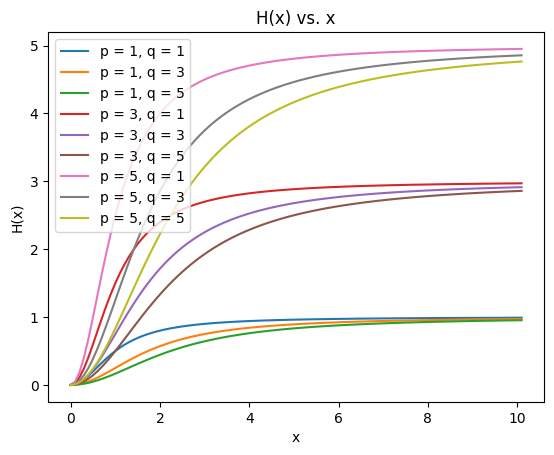

In [3]:
#2.1.5, Harvesting equation

import matplotlib.pyplot as plt
import math

p = 1
q = 1

h = [0]
x = [0]
xVariable = 0
hVariable = 0

#Harvesting Equation
hEquation = (p*pow(xVariable,2))/(q+pow(xVariable,2))




#figure, axes = plt.subplots(3, 3)
#figure.tight_layout()

#Iterate over values of p and q to create 9 different curves
while p <= 5:
    while q <= 5:
        while xVariable < 10:
            xVariable += 0.1
            hVariable = (p*pow(xVariable,2))/(q+pow(xVariable,2))
            h.append(hVariable)
            x.append(xVariable)

        plt.plot(x, h)
        q += 2
        x = [0]
        h = [0]
        xVariable = 0
        hVariable = 0
    p += 2
    q = 1


plt.xlabel('x')
plt.ylabel('H(x)')
plt.title('H(x) vs. x')
plt.legend(['p = 1, q = 1', 'p = 1, q = 3', 'p = 1, q = 5', 'p = 3, q = 1', 'p = 3, q = 3', 'p = 3, q = 5', 'p = 5, q = 1', 'p = 5, q = 3', 'p = 5, q = 5'])




0.0001
0.801899999999928
1.856399999999812
1.856499999999812
5.441900000000656


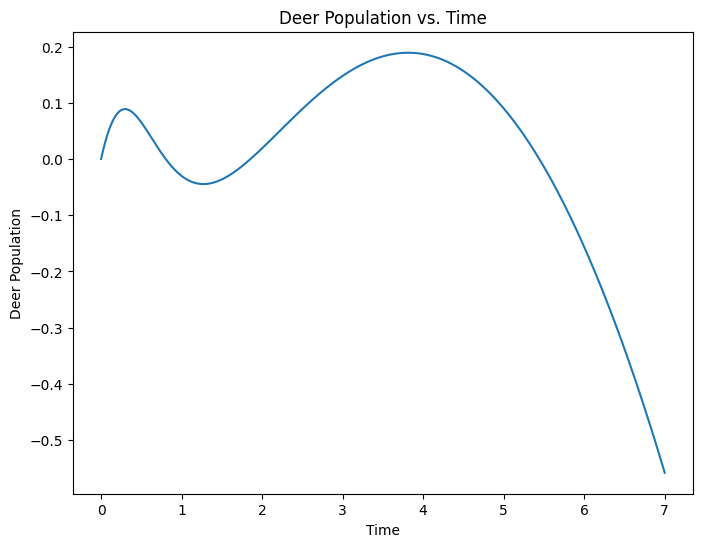

In [4]:
#Set A Problem 6

from scipy.optimize import fsolve

#Part a)

x = [0]
y = [0]
tVariable = 0
xVariable = 0

#USING EULER'S METHOD FOR PLOTTING RIGHT HAND SIDE OF EQUATION
while (xVariable < 7):
    yVariable = 0.65 * (1 - xVariable/8.1) * xVariable - (1.2*pow(xVariable,2)) / (1+pow(xVariable,2))
    xVariable += 0.0001
    y.append(yVariable)
    x.append(xVariable)
    if(yVariable >= -0.00001 and yVariable <= 0.00001):
        print(xVariable)

#PLOT SETTINGS
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title("Deer Population vs. Time")
plt.xlabel("Time")
plt.ylabel("Deer Population")
plt.show()


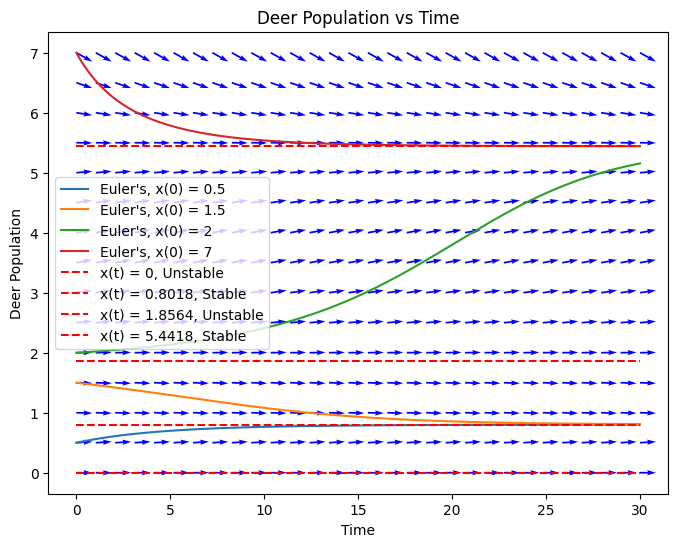

In [5]:
#Problem 6 Part b)

plt.figure(figsize=(8, 6))

def deer_dxdt(t : float, x : float, **constants) -> float:
    return 0.65 * (1 - x/8.1) * x - (1.2*pow(x,2)) / (1+pow(x,2))

t_interval = np.linspace(start=0, stop=30, num=30)
x_interval = np.linspace(start=0, stop=7, num =15)

t_quiver = []
x_quiver = []

for t in t_interval:
    for x in x_interval:
        t_quiver.append(t)
        x_quiver.append(x)
#t_quiver, x_quiver = np.meshgrid(t_interval, x_interval)

deer_t_quiver = []
deer_dxdt_quiver = []

x_equilibrium_1 = []
x_equilibrium_2 = []
x_equilibrium_3 = []
x_equilibrium_4 = []

for t in t_interval:
    x_equilibrium_1.append(0)
    x_equilibrium_2.append(0.8018)
    x_equilibrium_3.append(1.8564)
    x_equilibrium_4.append(5.4418)

for t in t_interval: 
    for x in x_interval:
        deer_t_quiver.append(1)
        deer_dxdt_quiver.append(deer_dxdt(0, x))

deer_euler_1 = eulers_method(x_0=0.5, t_interval=(0, 30), h=0.1, dxdt=deer_dxdt)
deer_euler_2 = eulers_method(x_0=1.5, t_interval=(0, 30), h=0.1, dxdt=deer_dxdt)
deer_euler_3 = eulers_method(x_0=2, t_interval=(0, 30), h=0.1, dxdt=deer_dxdt)
deer_euler_4 = eulers_method(x_0=7, t_interval=(0, 30), h=0.1, dxdt=deer_dxdt)

plt.plot(deer_euler_1[0], deer_euler_1[1], label="Euler's, x(0) = 0.5")
plt.plot(deer_euler_2[0], deer_euler_2[1], label="Euler's, x(0) = 1.5")
plt.plot(deer_euler_3[0], deer_euler_3[1], label="Euler's, x(0) = 2")
plt.plot(deer_euler_4[0], deer_euler_4[1], label="Euler's, x(0) = 7")

plt.plot(t_interval, x_equilibrium_1, 'r--', label='x(t) = 0, Unstable')
plt.plot(t_interval, x_equilibrium_2, 'r--', label='x(t) = 0.8018, Stable')
plt.plot(t_interval, x_equilibrium_3, 'r--', label='x(t) = 1.8564, Unstable')
plt.plot(t_interval, x_equilibrium_4, 'r--', label='x(t) = 5.4418, Stable')


plt.title("Deer Population vs Time")
plt.ylabel("Deer Population")
plt.xlabel("Time")
plt.legend()
plt.quiver(t_quiver, x_quiver, deer_t_quiver, deer_dxdt_quiver, color='b')

The differential equation is autonomous and does not depend on the value of t but rather the value of x, so when we have initial conditions that start at a particular value of x (such as between equilibria solutions or above or below), then the change in x is in a constant direction which is defined by the surrounding equilibria depending on their stability. An unstable equilibrium signifies that the vector field will point away from the curve, while a stable equilibrium suggests the opposite. So when a curve has an initial condition adjacent to a stable equilibrium solution, the curve will follow the vector field toward that equilibrium solution and away from the unstable ones. We can see x = 0 is unstable and x = 0.8018 is a stable solution. 

We see that the orange and turquoise curve start above or below the stable solution x = 0.8018 and as t increases, they tend toward this equilbrium solution as it is stable. Whereas, the green solution curve starts out above an unstable equilibrium curve and so it is repelled away, tending away from the unstable equilibrium.